In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt
import random

# Importing the required packages
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
nums=['ㄱ','ㄴ','ㄷ','ㄹ','ㅁ','ㅂ','ㅅ','ㅇ','ㅈ','ㅊ','ㅋ','ㅌ','ㅍ','ㅎ']

finaldata = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))
final_test = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))
j=0

for num in nums:
    path = '../data/자음/jy/%s.csv'%num
    num_jy = pd.read_csv(path, engine='python', encoding='cp949')
    num_jy.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_jy = num_jy
    
    for k in data_jy.columns:     #data.columns[w:] if you have w column of line description 
        data_jy[k] = data_jy[k].fillna(data_jy[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_jy.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_jy[150:]],sort=False,ignore_index = True)
    test_jy = data_jy[:150]
    final_test = pd.concat([final_test,test_jy], sort = False, ignore_index = True)
    #print(test_jy)
    #test_jy=test_jy.drop("Character", axis = 1)
    #print(finaldata)
#finaldata.isnull().any()
#finaldata_jy = finaldata_jy.astype({'Character':int})
#finaldata_jy

In [3]:
j=0

for num in nums:
    path = '../data/자음/yj/%s.csv'%num
    num_yj = pd.read_csv(path, engine='python', encoding='cp949')
    num_yj.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_yj = num_yj
    
    for k in data_yj.columns:     #data.columns[w:] if you have w column of line description 
        data_yj[k] = data_yj[k].fillna(data_yj[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_yj.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_yj[150:]],sort=False,ignore_index = True)
    test_yj = data_yj[:150]
    final_test = pd.concat([final_test,test_yj], sort = False, ignore_index = True)

In [4]:
j=0

for num in nums:
    path = '../data/자음/jh/%s.csv'%num
    num_jh = pd.read_csv(path, engine='python', encoding='cp949')
    num_jh.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_jh = num_jh
    
    for k in data_jh.columns:     #data.columns[w:] if you have w column of line description 
        data_jh[k] = data_jh[k].fillna(data_jh[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_jh.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_jh[150:]],sort=False,ignore_index = True)
    test_jh = data_jh[:150]
    final_test = pd.concat([final_test,test_jh], sort = False, ignore_index = True)

In [5]:
j=0

for num in nums:
    path = '../data/자음/nh/%s.csv'%num
    num_nh = pd.read_csv(path, engine='python', encoding='cp949')
    num_nh.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_nh = num_nh
    
    for k in data_nh.columns:     #data.columns[w:] if you have w column of line description 
        data_nh[k] = data_nh[k].fillna(data_nh[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_nh.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_nh[150:]],sort=False,ignore_index = True)
    test_nh = data_nh[:150]
    final_test = pd.concat([final_test,test_nh], sort = False, ignore_index = True)

## finaldata = train set(20306), final_test = test set(8400)

In [6]:
finaldata_tt = pd.concat([data_nh[150:],data_yj[150:],data_jy[150:],data_jh[150:]],sort=False,ignore_index = True)
finaldata_tt = finaldata.astype({'Character':int})
finaldata_tt

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.38,0.87,0.31,-3.54,-0.67,-3.42,470,233,318,246,434,0
1,0.37,0.89,0.29,3.42,-2.44,-4.03,473,233,316,247,433,0
2,0.38,0.88,0.28,-2.20,-3.48,-3.54,469,234,316,245,430,0
3,0.41,0.88,0.27,2.56,-6.35,2.81,465,233,313,249,429,0
4,0.37,0.88,0.29,-1.40,-1.10,-4.76,467,232,315,245,431,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20301,0.81,-0.53,0.30,0.85,-2.93,-2.81,276,222,305,397,229,13
20302,0.81,-0.52,0.31,-1.04,-2.99,-2.50,276,221,309,394,227,13
20303,0.80,-0.52,0.30,0.79,-3.23,-2.93,281,219,313,397,226,13
20304,0.80,-0.52,0.31,0.98,-3.05,-2.99,275,220,313,393,226,13


In [7]:
temp=[]
for i in range(8400):
    temp.append(random.randint(0, 14))

In [8]:
temp = np.array(temp)

In [61]:
test = final_test.copy()
test = test.drop("Character",axis = 1)
test

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
0,0.43,0.86,0.31,10.31,-3.91,4.21,472,224,312,264,418
1,0.46,0.85,0.27,20.45,1.83,4.94,466,226,307,268,413
2,0.36,0.92,0.24,29.36,14.71,-26.12,458,226,310,268,416
3,0.31,0.95,0.24,-15.20,-14.53,1.59,470,227,314,269,414
4,0.36,0.93,0.23,-2.99,-6.10,0.43,470,228,302,270,418
...,...,...,...,...,...,...,...,...,...,...,...
8395,0.68,-0.69,0.28,-10.74,-3.85,-2.99,273,218,306,397,221
8396,0.65,-0.71,0.25,-9.58,-7.20,-3.54,270,214,301,400,220
8397,0.69,-0.71,0.19,-13.24,-8.61,-6.71,265,214,299,405,219
8398,0.74,-0.68,0.16,-1.46,-3.91,-9.77,268,211,305,403,219


In [63]:
test["Character"] = temp
test

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.43,0.86,0.31,10.31,-3.91,4.21,472,224,312,264,418,1
1,0.46,0.85,0.27,20.45,1.83,4.94,466,226,307,268,413,11
2,0.36,0.92,0.24,29.36,14.71,-26.12,458,226,310,268,416,7
3,0.31,0.95,0.24,-15.20,-14.53,1.59,470,227,314,269,414,11
4,0.36,0.93,0.23,-2.99,-6.10,0.43,470,228,302,270,418,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8395,0.68,-0.69,0.28,-10.74,-3.85,-2.99,273,218,306,397,221,6
8396,0.65,-0.71,0.25,-9.58,-7.20,-3.54,270,214,301,400,220,12
8397,0.69,-0.71,0.19,-13.24,-8.61,-6.71,265,214,299,405,219,11
8398,0.74,-0.68,0.16,-1.46,-3.91,-9.77,268,211,305,403,219,2


In [64]:
x = pd.concat([finaldata,test],sort=False, ignore_index=True)
x = finaldata.drop("Character", axis = 1)
y = finaldata["Character"].copy()

In [65]:
x

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
0,0.38,0.87,0.31,-3.54,-0.67,-3.42,470,233,318,246,434
1,0.37,0.89,0.29,3.42,-2.44,-4.03,473,233,316,247,433
2,0.38,0.88,0.28,-2.20,-3.48,-3.54,469,234,316,245,430
3,0.41,0.88,0.27,2.56,-6.35,2.81,465,233,313,249,429
4,0.37,0.88,0.29,-1.40,-1.10,-4.76,467,232,315,245,431
...,...,...,...,...,...,...,...,...,...,...,...
20301,0.81,-0.53,0.30,0.85,-2.93,-2.81,276,222,305,397,229
20302,0.81,-0.52,0.31,-1.04,-2.99,-2.50,276,221,309,394,227
20303,0.80,-0.52,0.30,0.79,-3.23,-2.93,281,219,313,397,226
20304,0.80,-0.52,0.31,0.98,-3.05,-2.99,275,220,313,393,226


In [73]:
clf = ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)

In [74]:
cross_val_score_array1 = cross_val_score(clf, x, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[0.97341211 0.99556869 0.99950763 0.99310684 0.99113737 0.95322501
 0.99802956 0.98866995 0.99802956 0.97389163]
acc/t 0.9864578345982105
acc-stdev/t 0.014228970824463245


In [76]:
clf.fit(x_train, y_train)
pred = clf.predict(x_valid)

In [77]:
pred = clf.predict(x_valid)

In [78]:
clf

ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

In [79]:
x_valid

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
14616,0.26,-0.94,0.23,4.52,-0.61,-3.42,254,195,247,238,259
19834,-0.20,-0.89,0.41,0.49,-2.75,-2.75,258,211,296,289,267
3099,0.47,0.69,0.62,-2.56,-0.61,-6.41,483,400,309,244,393
3173,0.41,0.79,0.49,-8.85,-10.80,-0.43,474,401,331,261,421
6933,-0.16,-0.98,0.06,0.18,-2.32,-2.62,472,404,467,312,457
...,...,...,...,...,...,...,...,...,...,...,...
2113,-0.04,-0.99,0.07,0.06,-1.77,-2.87,475,427,493,444,320
18911,0.32,0.89,0.35,-1.22,-2.99,-1.28,328,398,320,360,258
5273,0.45,0.81,0.42,8.48,4.64,-9.03,330,251,468,418,241
2257,-0.10,-0.99,-0.06,0.06,-0.61,-2.32,470,422,491,456,320


In [80]:
clf.feature_importances_

array([0.12105207, 0.16074626, 0.0528103 , 0.00192859, 0.00196514,
       0.0019427 , 0.16310892, 0.15331345, 0.13739632, 0.09602209,
       0.10971415])

In [81]:
pd.Series(y).value_counts()

0     1570
13    1524
3     1512
10    1452
9     1449
12    1441
6     1437
1     1432
4     1428
8     1416
2     1414
7     1414
5     1413
11    1404
Name: Character, dtype: int64

In [82]:
pd.Series(y_valid).value_counts()

0     157
13    153
3     151
9     145
10    145
6     144
12    144
1     143
4     143
2     142
8     142
5     141
7     141
11    140
Name: Character, dtype: int64

In [83]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       142
           3       0.99      1.00      1.00       151
           4       1.00      0.99      1.00       143
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       144
           7       0.99      1.00      0.99       141
           8       1.00      1.00      1.00       142
           9       1.00      1.00      1.00       145
          10       1.00      1.00      1.00       145
          11       1.00      0.99      1.00       140
          12       0.99      0.99      0.99       144
          13       1.00      1.00      1.00       153

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [84]:
print(accuracy_score(y_valid, pred))

0.9980305268340719


In [85]:
y_train_pred = cross_val_predict(clf, x_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[1412,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0],
       [   0, 1289,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0, 1272,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0, 1357,    0,    0,    0,    0,    0,    0,    0,
           4,    0,    0],
       [   0,    0,    0,    0, 1284,    0,    0,    0,    0,    0,    0,
           0,    1,    0],
       [   0,    0,    0,    0,    0, 1272,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   1,    0,    0,    0,    0,    0, 1292,    0,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1273,    0,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1274,    0,    0,
           0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1304,    0,
           0,    

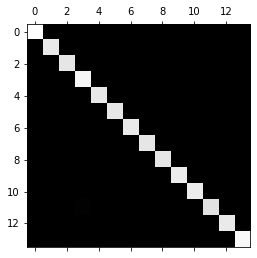

In [86]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# 모음

In [9]:
nums=['ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
j=14

for num in nums:
    path = '../data/모음/jy/%s.csv'%num
    num_jy = pd.read_csv(path, engine='python', encoding='cp949')
    num_jy.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_jy = num_jy
    
    for k in data_jy.columns:     #data.columns[w:] if you have w column of line description 
        data_jy[k] = data_jy[k].fillna(data_jy[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_jy.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_jy[150:]],sort=False,ignore_index = True)
    test_jy = data_jy[:150]
    final_test = pd.concat([final_test,test_jy], sort = False, ignore_index = True)


In [10]:
j=14

for num in nums:
    path = '../data/모음/yj/%s.csv'%num
    num_yj = pd.read_csv(path, engine='python', encoding='cp949')
    num_yj.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_yj = num_yj
    
    for k in data_yj.columns:     #data.columns[w:] if you have w column of line description 
        data_yj[k] = data_yj[k].fillna(data_yj[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_yj.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_yj[150:]],sort=False,ignore_index = True)
    test_yj = data_yj[:150]
    final_test = pd.concat([final_test,test_yj], sort = False, ignore_index = True)


In [11]:
j=14

for num in nums:
    path = '../data/모음/nh/%s.csv'%num
    num_nh = pd.read_csv(path, engine='python', encoding='cp949')
    num_nh.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_nh = num_nh
    
    for k in data_nh.columns:     #data.columns[w:] if you have w column of line description 
        data_nh[k] = data_nh[k].fillna(data_nh[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_nh.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_nh[150:]],sort=False,ignore_index = True)
    test_nh = data_nh[:150]
    final_test = pd.concat([final_test,test_nh], sort = False, ignore_index = True)

In [12]:
j=14

for num in nums:
    path = '../data/모음/jh/%s.csv'%num
    num_jh = pd.read_csv(path, engine='python', encoding='cp949')
    num_jh.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_jh = num_jh
    
    for k in data_jh.columns:     #data.columns[w:] if you have w column of line description 
        data_jh[k] = data_jh[k].fillna(data_jh[k].median())
    #data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_jh.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata,data_jh[150:]],sort=False,ignore_index = True)
    test_jh = data_jh[:150]
    final_test = pd.concat([final_test,test_jh], sort = False, ignore_index = True)

In [13]:
final_test

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.43,0.86,0.31,10.31,-3.91,4.21,472,224,312,264,418,0.0
1,0.46,0.85,0.27,20.45,1.83,4.94,466,226,307,268,413,0.0
2,0.36,0.92,0.24,29.36,14.71,-26.12,458,226,310,268,416,0.0
3,0.31,0.95,0.24,-15.20,-14.53,1.59,470,227,314,269,414,0.0
4,0.36,0.93,0.23,-2.99,-6.10,0.43,470,228,302,270,418,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.36,0.82,0.49,-0.92,-2.81,-2.01,464,225,267,364,331,29.0
17996,0.31,0.84,0.52,1.77,-8.06,-0.85,463,229,267,361,330,29.0
17997,0.36,0.80,0.50,2.56,-2.44,-4.39,457,223,267,363,330,29.0
17998,0.34,0.81,0.51,-0.55,-1.46,-2.99,461,226,268,364,330,29.0


In [14]:
finaldata

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.38,0.87,0.31,-3.54,-0.67,-3.42,470,233,318,246,434,0.0
1,0.37,0.89,0.29,3.42,-2.44,-4.03,473,233,316,247,433,0.0
2,0.38,0.88,0.28,-2.20,-3.48,-3.54,469,234,316,245,430,0.0
3,0.41,0.88,0.27,2.56,-6.35,2.81,465,233,313,249,429,0.0
4,0.37,0.88,0.29,-1.40,-1.10,-4.76,467,232,315,245,431,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43983,0.22,0.81,0.59,0.24,-3.42,-4.33,462,226,273,358,340,29.0
43984,0.21,0.78,0.59,0.06,-2.32,-3.23,466,226,282,361,338,29.0
43985,0.21,0.79,0.58,0.18,-4.15,-2.26,462,224,272,360,339,29.0
43986,0.21,0.79,0.59,0.67,-2.44,-2.50,462,224,272,361,337,29.0


In [15]:
temp=[]
for i in range(18000):
    temp.append(random.randint(0, 30))

In [16]:
temp = np.array(temp)

In [17]:
test = final_test.copy()
test = test.drop("Character",axis = 1)
test

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
0,0.43,0.86,0.31,10.31,-3.91,4.21,472,224,312,264,418
1,0.46,0.85,0.27,20.45,1.83,4.94,466,226,307,268,413
2,0.36,0.92,0.24,29.36,14.71,-26.12,458,226,310,268,416
3,0.31,0.95,0.24,-15.20,-14.53,1.59,470,227,314,269,414
4,0.36,0.93,0.23,-2.99,-6.10,0.43,470,228,302,270,418
...,...,...,...,...,...,...,...,...,...,...,...
17995,0.36,0.82,0.49,-0.92,-2.81,-2.01,464,225,267,364,331
17996,0.31,0.84,0.52,1.77,-8.06,-0.85,463,229,267,361,330
17997,0.36,0.80,0.50,2.56,-2.44,-4.39,457,223,267,363,330
17998,0.34,0.81,0.51,-0.55,-1.46,-2.99,461,226,268,364,330


In [18]:
test["Character"] = temp
test

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.43,0.86,0.31,10.31,-3.91,4.21,472,224,312,264,418,0
1,0.46,0.85,0.27,20.45,1.83,4.94,466,226,307,268,413,18
2,0.36,0.92,0.24,29.36,14.71,-26.12,458,226,310,268,416,7
3,0.31,0.95,0.24,-15.20,-14.53,1.59,470,227,314,269,414,14
4,0.36,0.93,0.23,-2.99,-6.10,0.43,470,228,302,270,418,18
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.36,0.82,0.49,-0.92,-2.81,-2.01,464,225,267,364,331,19
17996,0.31,0.84,0.52,1.77,-8.06,-0.85,463,229,267,361,330,19
17997,0.36,0.80,0.50,2.56,-2.44,-4.39,457,223,267,363,330,19
17998,0.34,0.81,0.51,-0.55,-1.46,-2.99,461,226,268,364,330,23


In [19]:
x = pd.concat([finaldata,test],sort=False, ignore_index=True)
x = finaldata.drop("Character", axis = 1)
y = finaldata["Character"].copy()

In [20]:
x

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
0,0.38,0.87,0.31,-3.54,-0.67,-3.42,470,233,318,246,434
1,0.37,0.89,0.29,3.42,-2.44,-4.03,473,233,316,247,433
2,0.38,0.88,0.28,-2.20,-3.48,-3.54,469,234,316,245,430
3,0.41,0.88,0.27,2.56,-6.35,2.81,465,233,313,249,429
4,0.37,0.88,0.29,-1.40,-1.10,-4.76,467,232,315,245,431
...,...,...,...,...,...,...,...,...,...,...,...
43983,0.22,0.81,0.59,0.24,-3.42,-4.33,462,226,273,358,340
43984,0.21,0.78,0.59,0.06,-2.32,-3.23,466,226,282,361,338
43985,0.21,0.79,0.58,0.18,-4.15,-2.26,462,224,272,360,339
43986,0.21,0.79,0.59,0.67,-2.44,-2.50,462,224,272,361,337


In [21]:
clf = ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)

In [22]:
cross_val_score_array1 = cross_val_score(clf, x, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[0.95317118 0.98681519 0.99477154 0.99477154 0.99590816 0.94385088
 0.98863378 0.99454421 0.99863574 0.98703956]
acc/t 0.9838141776609902
acc-stdev/t 0.018165630578854956


In [23]:
clf.fit(x_train, y_train)
pred = clf.predict(x_valid)

In [24]:
pred = clf.predict(x_valid)

In [25]:
clf

ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

In [26]:
x_valid

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
43408,0.92,-0.40,0.03,-5.43,-2.08,-2.75,468,216,261,390,339
31767,0.51,0.81,0.29,0.18,-3.54,-2.32,442,210,282,357,363
5583,0.93,-0.37,-0.11,-0.12,-3.60,-2.50,315,248,467,400,236
37800,0.33,0.88,0.34,7.75,-3.91,-0.61,448,239,297,371,303
5720,0.90,-0.38,-0.14,-0.06,-3.91,-1.40,312,241,470,398,236
...,...,...,...,...,...,...,...,...,...,...,...
21898,0.30,-0.96,0.14,0.43,-7.32,0.12,457,249,300,247,331
35179,0.84,-0.35,0.44,-2.62,-2.56,-6.23,454,204,242,236,334
35045,0.87,-0.32,0.37,0.73,-2.20,-2.50,458,204,242,228,326
7732,-0.17,-0.96,-0.17,0.92,-1.89,-3.23,406,287,335,344,422


In [27]:
clf.feature_importances_

array([0.11196828, 0.13015095, 0.06753111, 0.00206567, 0.00208394,
       0.00205655, 0.12990984, 0.14937995, 0.13690796, 0.15518479,
       0.11276096])

In [28]:
pd.Series(y).value_counts()

15.0    1811
18.0    1595
0.0     1570
13.0    1524
23.0    1521
3.0     1512
24.0    1500
17.0    1467
25.0    1463
10.0    1452
26.0    1450
9.0     1449
22.0    1448
27.0    1446
12.0    1441
21.0    1439
6.0     1437
20.0    1432
1.0     1432
28.0    1431
4.0     1428
16.0    1423
29.0    1423
14.0    1421
8.0     1416
7.0     1414
2.0     1414
5.0     1413
19.0    1412
11.0    1404
Name: Character, dtype: int64

In [29]:
pd.Series(y_valid).value_counts()

15.0    181
18.0    160
0.0     157
13.0    153
23.0    152
3.0     151
24.0    150
17.0    147
25.0    146
22.0    145
26.0    145
27.0    145
10.0    145
9.0     145
12.0    144
21.0    144
6.0     144
4.0     143
28.0    143
20.0    143
1.0     143
29.0    142
2.0     142
16.0    142
8.0     142
14.0    142
19.0    141
5.0     141
7.0     141
11.0    140
Name: Character, dtype: int64

In [30]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       157
         1.0       1.00      1.00      1.00       143
         2.0       1.00      1.00      1.00       142
         3.0       0.99      1.00      1.00       151
         4.0       1.00      0.99      1.00       143
         5.0       0.99      1.00      1.00       141
         6.0       0.99      0.99      0.99       144
         7.0       0.99      1.00      1.00       141
         8.0       1.00      1.00      1.00       142
         9.0       1.00      1.00      1.00       145
        10.0       1.00      1.00      1.00       145
        11.0       1.00      0.99      1.00       140
        12.0       0.99      0.99      0.99       144
        13.0       1.00      1.00      1.00       153
        14.0       0.99      1.00      1.00       142
        15.0       1.00      0.99      1.00       181
        16.0       1.00      1.00      1.00       142
        17.0       1.00    

In [31]:
print(accuracy_score(y_valid, pred))

0.9984087292566493


In [32]:
y_train_pred = cross_val_predict(clf, x_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[1412,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1289,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1272,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1355,    0,    0,    0,    0,    0,    0,    0,
           5,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1284,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

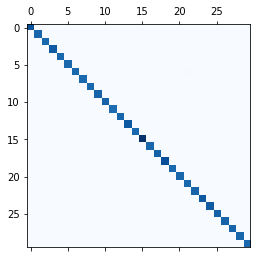

In [37]:
#plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.matshow(conf_mx,cmap=plt.cm.Blues)

plt.show()